In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them
import scipy.optimize as opt
import scipy.linalg as la

In [86]:
### Part II
rng = np.random.default_rng()

In [72]:
A = np.array([[0.98, 0.1, 0], [0.02, 0.7, 0.05], [0, 0.2, 0.95]])

In [96]:
Tmax=5000

#intialize array of states; need to be integers as will use as indices below
states=np.zeros(Tmax,dtype=int)
#set initial state
states[0]=0        

In [97]:
for t in np.arange(Tmax-1):
    r = rng.uniform(0,1,1)   #draw random variable (uniformly distributed in 0,1)

    if r < A[0, states[t]] :     #%for transition FROM states[t] to state 0
        states[t+1] = 0
    else:
        states[t+1] = 1

Text(0, 0.5, 'timestep')

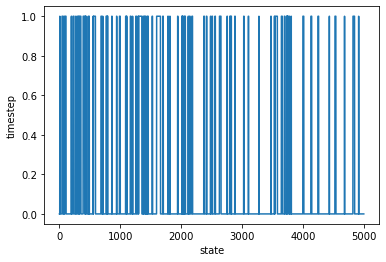

In [98]:
plt.plot(states)
plt.xlabel('state')
plt.ylabel('timestep')

In [ ]:
### Part I
## 4 open states, 2 closed states
### If a supersate contains N indistiguishable states the 
### P(dwell time = m) = c1lambda1^m+c2lambda2^m+...+cNlambdaN^m
### open states are s1-s4; closed states s5 and s6
### Matrix A = ([[a11, a12, a13, a14, a15, a16], 
### [a21, a22, a23, a24, a25, a26],.....,[a61, a62, a63, a64, a65, a66]])
### vector p(k) = ([p1(k), p2(k), p3(k), p4(k), p5(k), p6(k)])
### p(0) = ([p1(0), p2(0), p3(0), p4(0), 0, 0]) because it is open so
### the probability of it being in one of the closed states is 0.
### p(1) = Ap(0) = ([a11p1(0)+a12p2(0)+a13p3(0)+a14p4(0)],
### [a21p1(0)+a22p2(0)+a23p3(0)+a24p4(0)],
### [a31p1(0)+a32p2(0)+a33p3(0)+a34p4(0)],
### [a41p1(0)+a42p2(0)+a43p3(0)+a44p4(0)]) 
### We do not care about the last two rows because they are the closed states.
### p^c(k) is the probability of being in state at time k given
### in state 1, 2, 3, 4 for any time between 0 and k.
### p^c(1)= ([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34], 
### [a41, a42, a43, a44]])[p1^c(0),p2^c(0),p3^c(0),p4^c(0)]
### p^c(k+1)= ([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34],
### [a41, a42, a43, a44]])[p1^c(k),p2^c(k),p3^c(k),p4^c(k)]
### [p1^c(k),p2^c(k),p3^c(k),p4^c(k)] = c1lambda1^k[(v_1,1),(v_1,2),(v_1,3),(v_1,4)]+
### c2lambda2^k[(v_2,1),(v_2,2),(v_2,3),(v_2,4)]+
### c3lambda3^k[(v_3,1),(v_3,2),(v_3,3),(v_3,4)]+
### c4lambda4^k[(v_4,1),(v_4,2),(v_4,3),(v_4,4)]
### probability(state is in 1,2,3,or 4 for time 0,...,k)= 
### k1lambda1^k+k2lambda2^k+k3lambda3^k+k4lambda4^k
### p(dwell time is exactly m steps) = p^dwell(k)
### k1lambda1^k+k2lambda2^k+k3lambda3^k+k4lambda4^k=
## from m=k to infinity sigma p^dwell(k)
### k1lambda1^(k+1)+k2lambda2^(k+1)+k3lambda3^(k+1)+k4lambda4^(k+1)=
### from m=k+1 to infinity sigma p^dwell(k)
### p^dwell(k) = k1lambda1^k+k2lambda2^k+k3lambda3^k+k4lambda4^k- 
### k1lambda1^(k+1)+k2lambda2^(k+1)+k3lambda3^(k+1)+k4lambda4^(k+1)
### p^dwell(k) = k1lambda1^k(1-lambda1)+k2lambda2^k(1-lambda2)+
### k3lambda3^k(1-lambda3)+k4lambda4^k(1-lambda4)
### p^dwell(k) = k1^mlambda1^k+k2^mlambda2^k+k3^mlambda3^k+k4^mlambda4^k